# Testing influence of noise on projection on PCA components

In [3]:
import seaborn as sns
import numpy as np
import sklearn.datasets, sklearn.decomposition
import matplotlib.pyplot as plt 
%matplotlib inline  

In [26]:
import pandas as pd
X = pd.read_csv('mnist_train.csv', header=None, nrows = 3000).as_matrix()
X = np.delete(X, 0, axis = 1)

In [27]:
def show_figure(arr, ax = None):
    # convert matrix to figure/heatmap using a grey scale colormap, round any negative values to zero 
    matrix = arr.reshape((28,28)).clip(min =0)
    sns.heatmap(matrix, cmap=plt.cm.Greys, square=True, cbar = False, xticklabels = False, yticklabels = False, ax = ax)

In [28]:
def Laplace(scale, data):
    # adding independent laplace noise at a particular scale to all cells in data
    return data+np.random.laplace(loc=0.0, scale=scale, size=data.size).reshape(data.shape)

In [34]:
def noisyPCA(scale, nComp):
    mu = np.mean(X, axis=0)
    pca = sklearn.decomposition.PCA()
    pca.fit(X)
    
    #feature vector
    f = pca.transform(X)[:,:nComp]
    f= Laplace(scale,f)
    Xhat = np.dot(f, pca.components_[:nComp,:])
    return Xhat + mu


In [57]:
def plot(scale, nComp, index):
    f, (ax1, ax2) = plt.subplots(1,2)
    Xhat = noisyPCA(scale, nComp)
    show_figure(X[index], ax1)
    show_figure(Xhat[index], ax2) 
    ax1.set_title("True data")
    ax2.set_title("Noisy data")
    title = 'Noise scale: {0}, nComp: {1}'.format(scale, nComp)
    f.suptitle(title, fontsize = 20)

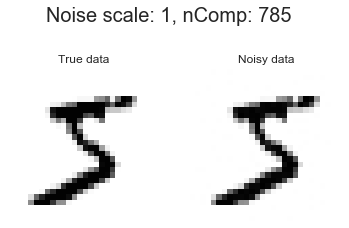

In [58]:
# small noise scale, all components used
plot(scale = 1, nComp = 785, index = 0)

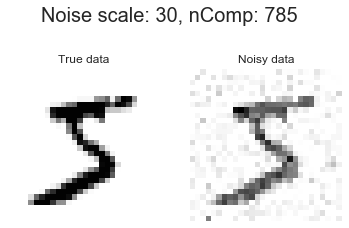

In [59]:
# medium noise scale, all components used
plot(scale = 30, nComp = 785, index = 0)

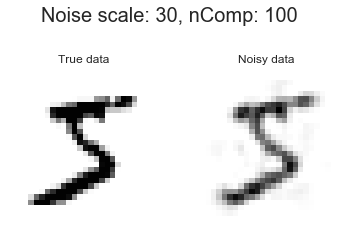

In [60]:
# medium noise scale, high-ranked components used
plot(scale = 30, nComp = 100, index = 0)

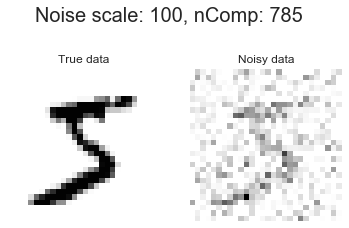

In [61]:
# High noise scale, all components used
plot(scale = 100, nComp = 785, index = 0)

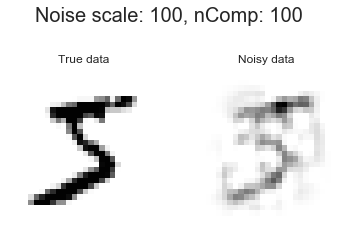

In [63]:
# High noise scale, high-ranked components used
plot(scale = 100, nComp = 100, index = 0)